In [29]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
import cv2
from google.colab.patches import cv2_imshow
from numpy import genfromtxt
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.decomposition import PCA
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.metrics import mean_squared_error

# Q1

In [11]:
hits_number = np.array([49, 44, 34, 21, 11])
false_alarm_number = np.array([37, 33, 13, 7, 1])

In [12]:
hits_percentage = hits_number / 50
false_alarm_percentage = false_alarm_number / 50

In [13]:
z_Fs,z_Hs = [],[]
for i in range(3):
    z_Hs.append(-norm.ppf(1-hits_percentage[i]))
    z_Fs.append(-norm.ppf(1-false_alarm_percentage[i]))

In [14]:
lr = LinearRegression().fit(np.array(z_Fs).reshape(-1, 1), np.array(z_Hs).reshape(-1, 1))
sigma_v = 1/lr.coef_[0,0]

In [15]:
mu_v = lr.coef_[0,0] * lr.intercept_[0]

In [16]:
display(pd.DataFrame([[0, 1],[mu_v, sigma_v]],columns=['mu','sigma'],index=['noise','signal']))

,mu,sigma
noise,0.000000,1.000000
signal,1.150719,0.944223


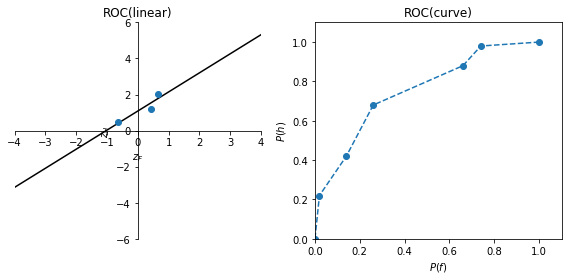

In [17]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 2, 1)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.set_xlabel('$z_F$')
ax.set_ylabel('$z_H$')
ax.set_xlim([-4,4])
ax.set_ylim([-6,6])
x = np.linspace(-4,4,10)
y = lr.coef_[0,0] * x + lr.intercept_[0]
ax.plot(x, y, color='black')
ax.plot(z_Fs, z_Hs, 'o')
ax.set_title('ROC(linear)')

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_xlabel('$P(f)$')
ax1.set_ylabel('$P(h)$')
ax1.set_xlim([0,1.1])
ax1.set_ylim([0,1.1])
x = [1] + false_alarm_percentage.tolist() + [0]
y = [1] + hits_percentage.tolist() + [0]
ax1.plot(x,y,'--o')
ax1.set_title('ROC(curve)')
# plt.show()
plt.tight_layout()

# Q2

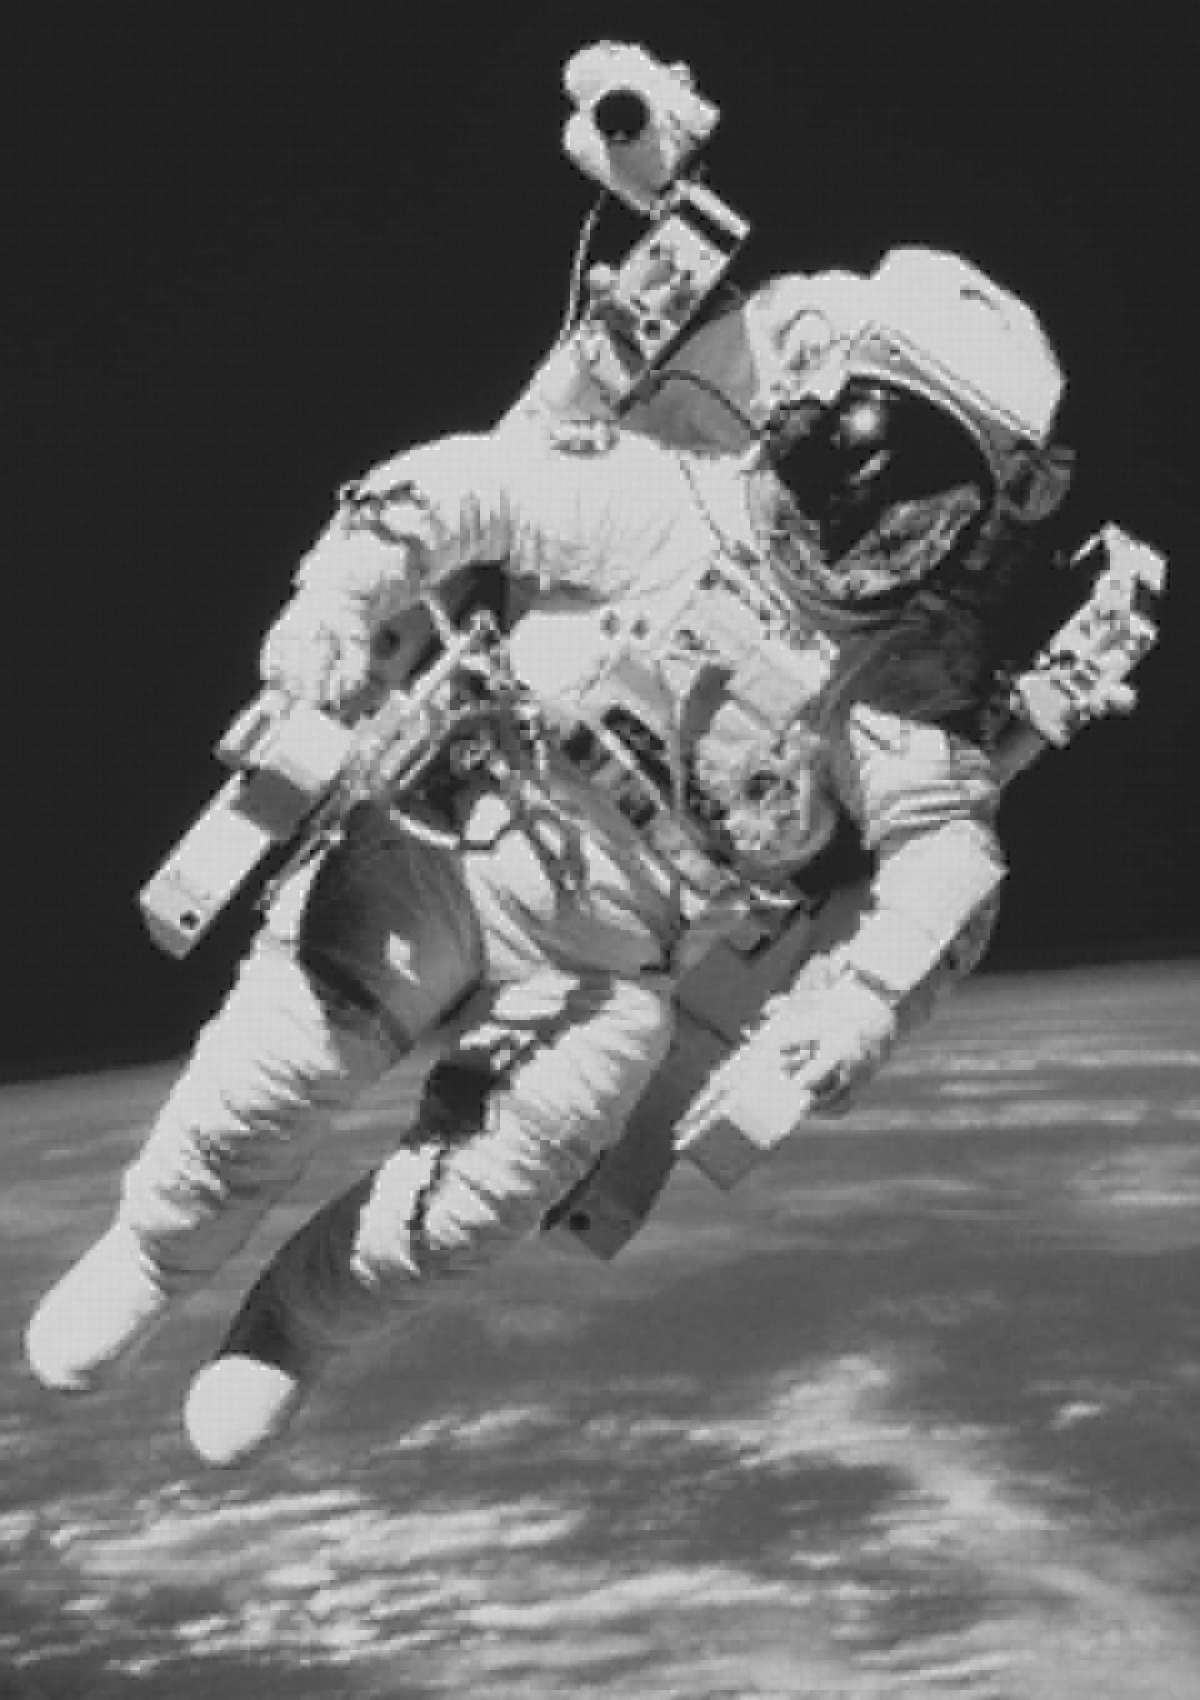

20400

In [18]:
readin = np.array(genfromtxt('astro.csv'))
cv2_imshow(readin)
x_dim = readin.shape[0]
y_dim = readin.shape[1]
x_patch = 10
y_patch = 10

x_patch_num = int(np.floor(x_dim/x_patch))
y_patch_num = int(np.floor(y_dim/y_patch))
patches_num = x_patch_num * y_patch_num
patches_num

In [19]:
patch_list = np.zeros((x_patch, y_patch, int(patches_num)))

In [20]:
counter = 0
for i in range(1, x_patch_num + 1):
  for j in range(1, y_patch_num + 1):
    top = (i-1)* x_patch
    bottom = i * x_patch
    left = (j-1)* y_patch
    right = j * y_patch
    patch_list[:,:, counter] = readin[top:bottom, left:right]
    counter += 1

print(counter)

20400


In [21]:
reshaped_patch_list = np.rollaxis(patch_list, 2, 0).reshape((20400, 100))
reshaped_patch_list.shape

(20400, 100)

In [22]:
pca = PCA()
projected = pca.fit_transform(reshaped_patch_list)

In [23]:
explained = 0
index = 0

while explained < 0.99:
  explained += pca.explained_variance_ratio_[index]
  index += 1

print("number of eigenvalues to explain 99% is", index + 1)
print("total variance explained the first ", index + 1, "eigenvalues is ", explained)

number of eigenvalues to explain 99% is 4
total variance explained the first  4 eigenvalues is  0.9998353362257617


In [24]:
first_six_components = pca.components_[:6]

In [25]:
reconstructed = np.dot(projected[:, :6], pca.components_[:6])
print(reconstructed.shape)

(20400, 100)


In [26]:
img_reconstructed = np.zeros((x_patch * x_patch_num, y_patch * y_patch_num))
counter = 0

for i in range(1, x_patch_num + 1):
  for j in range(1, y_patch_num + 1):
    top = (i-1)* x_patch
    bottom = i * x_patch
    left = (j-1)* y_patch
    right = j * y_patch

    # img_reconstructed((top:bottom),(left:right)) = reconstructed_listPatches(:,:,cnt)
    img_reconstructed[top:bottom, left:right] = reconstructed[counter].reshape(10, 10)
    counter += 1

print(counter)

20400


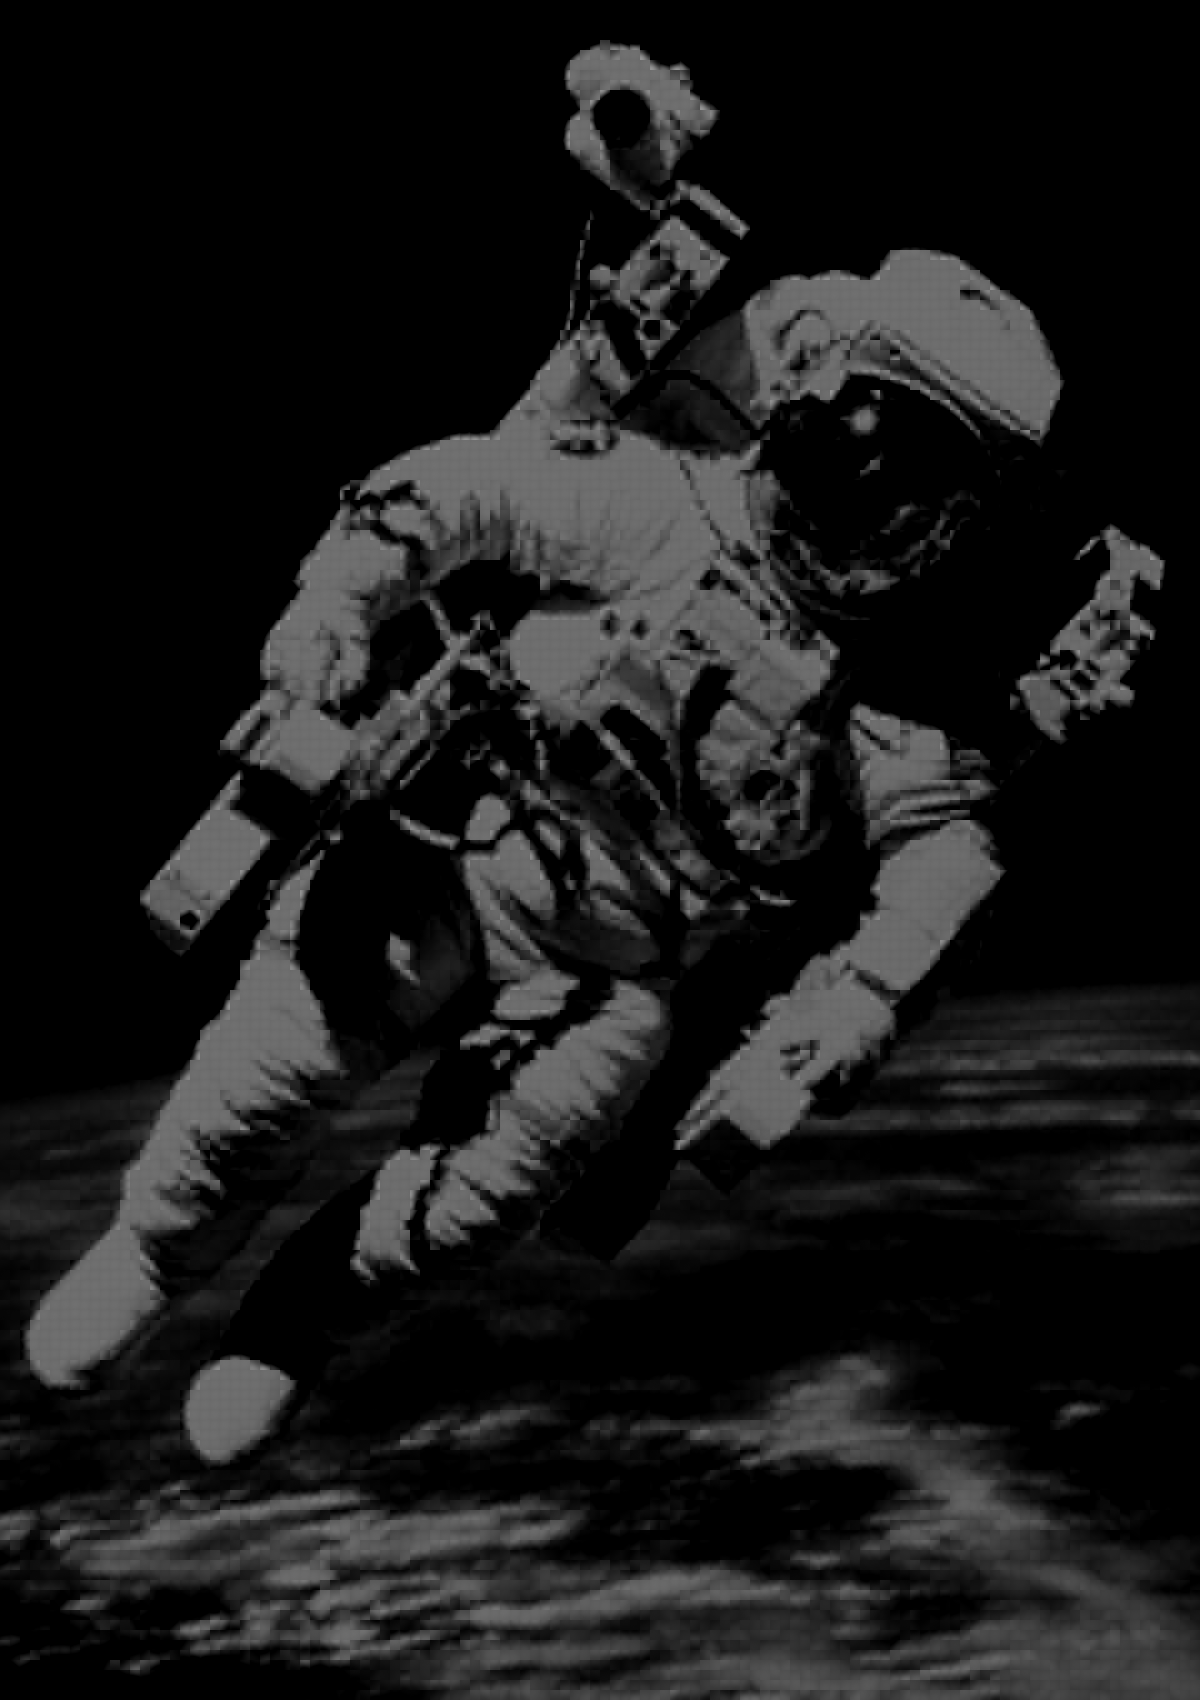

In [27]:
cv2_imshow(img_reconstructed)

# Q3

In [31]:
stimulus_level = np.array([0.4, 0.9, 1.2, 1.7, 2.3])
number_of_yes = np.array([1, 6, 13, 32, 49])

In [36]:
lr = LinearRegression().fit(stimulus_level.reshape(-1, 1), number_of_yes.reshape(-1, 1))
number_of_yes_predicted = lr.predict(stimulus_level.reshape(-1, 1))
mean_squared_error(number_of_yes, number_of_yes_predicted)

12.380560747663555

In [ ]:
mean_squared_error(y_true, y_pred)